# Setting up libraries and environment

In [1]:
#import relevant libraries and setup
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\arao2\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
#Dealing with missing NaN, by excluding them:
df=clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


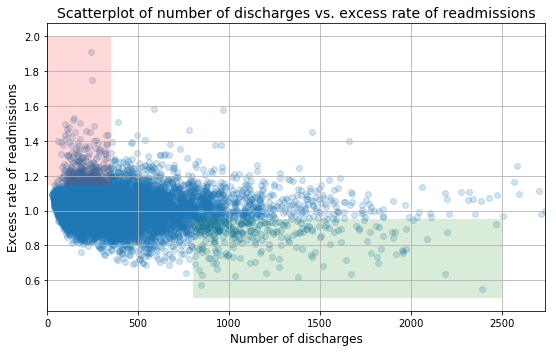

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [17]:
#creating some functions for analysis.
def mean_std (measure):
    """
    Input: series with non-missing values
    Output: mean and sample standard deviation
    NOTE: Need to clear up the nan prior to using this defintion
     """
    s=1.0*sum(measure)#this excludes nan
    N=1.0*len(measure)#this does not exclude nan!!
    mean=(s/N)
    diff=[]
    for num in measure:
        diff.append((num-mean)**2)
        variance=sum(diff)
    std=(variance**(.5))/(N-1)**(.5)
    return mean,std

def disch_cat(row):
    """
    Purpose: To create three category scheme.
    Input: based on number of discharges per each row.
    Output: a new column (<100, 100-999,1000+)
    """
    if row['Number of Discharges'] < 100:
        return 0
    elif 100<=row['Number of Discharges'] <=1000:
        return 1
    else:
        return 2
    
def disch_cat300(row):
    """
    Purpose: To create a second category scheme based on <300 vs 300+
    Input: based on number of discharges per each row.
    Output: a new column (<100, 100-999,1000+)
    """
    if row['Number of Discharges'] < 300:
        return 0
    else:
        return 1

In [18]:
#df.apply (lambda row: disch_cat (row),axis=1)
df['DischCat']=df.apply(disch_cat, axis=1)

C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
df['DischCat300']=df.apply(disch_cat300, axis=1)

C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# ANSWERS

# A)  The recommendation is based on a capacity of 300 rather than what was used in the statistical section (ie/100 vs 100-1000 vs >1000).  Secondly, the statistical section shows a difference of .045 in the excess readmission ratio when comparing < 100 capacity vs >1000.  This does not seem to be clinically significant. Even if there is a statistical signifiance, this may be due to the large sample size and may not be meaningful in a clinical/practical setting.

# B) Hypothesis Testing.  I will setup two test. The first will compare two groups, < 100 vs >1000, as per their statistical section.  The second will compare two groups, < 300 vs >300, as per their recommendation.  The null and altherantive hypothesis will be the same in the two tests (ie/ comparing means between two groups).
Null Hypothesis: there is no statisticall signficant difference of excess readmission between the the two groups.   

Alternative Hypoth: The excess readmission is differnet between the two hospital capacity groups.

In [11]:
u,std=mean_std(df['Excess Readmission Ratio'])

In [24]:
print("overall mean:",u,","," overall std:",std)

overall mean: 1.0075037836 ,  overall std: 0.091964266033


In [44]:
#95%CI
def ci_i (ci,mean,n,std):
    """
    Input:
    Output: 2 tailed confidence interval (95% or 99%)
    Note: assumes only 100 DF
    """
    if ci==95:
        limit=1.984*(std/((n)**(.5)))
        return (mean-limit,mean+limit)
    elif ci==99:
        limit=2.626*(std/((n)**(.5)))
        return (mean-limit,mean+limit)
    else:
        print("Error")

In [46]:
result1 = df.groupby(['DischCat'], as_index=False).agg(
                      {'Excess Readmission Ratio':['mean','std','var','count']})
result1

DischCat Excess Readmission Ratio                          
                               mean       std       var count
0        0                 1.022618  0.057979  0.003362  1188
1        1                 1.007052  0.093417  0.008727  9846
2        2                 0.978335  0.120007  0.014402   463

In [55]:
confint_100=ci_i(99,1.022618,1188,.057979)
confint_1000=ci_i(99,0.978335,463,0.120007)
confint_100

(1.018200696677186, 1.0270353033228141)

In [56]:
confint_1000

(0.9636892773543486, 0.9929807226456513)

Notice here the mean ratios are exactly what they reported in the statistical section.  More specically, the mean excess readmission ratio for hosptials with discharge < 100 is 1.02 (99%CI: 1.02,1.03).  The mean excess readmission ratio for hopsitals with discharge > 100 is 0.98 (95%CI: 0.96, 0.99). The mean ratios are fairly similar even though the 99% CI do not overlap.  This may be due to the large sample size. There is no mention of comparing the middle group 1 (100-1000).  

In [53]:
result2 = df.groupby(['DischCat300'], as_index=False).agg(
                      {'Excess Readmission Ratio':['mean','std','var','count']})
result2

DischCat300 Excess Readmission Ratio                          
                                  mean       std       var count
0           0                 1.014238  0.082478  0.006803  6108
1           1                 0.999871  0.101118  0.010225  5389

In [58]:
confint_100=ci_i(99,1.014238,6108,.082478)
confint_1000=ci_i(99,0.999871,5389,0.101118)
confint_100

(1.0114667013589393, 1.0170092986410606)

In [59]:
confint_1000

(0.9962538284934707, 1.0034881715065294)

After categorizing hospital discharge as < 300 vs > 300, the mean excess readmission ratio for hosptials with discharge < 300 is 1.01 (99%CI:1.01,1.02). The mean excess readmission ratio for hopsitals with discharge > 300 is 0.99 (95%CI: 0.996, 1.00). As previous, the mean ratios are fairly similar even though the 99% CI do not overlap. This may be due to the large sample size.

In [66]:
#Hypothesis Testing 1:
from scipy.stats import ttest_ind, ttest_ind_from_stats
ttest1, pval1 = ttest_ind_from_stats(1.022618, 0.057979, 1188,
                              0.978335,0.120007,463,
                              equal_var=False)

#Hypothesis Testing 2:
ttest2, pval2 = ttest_ind_from_stats(1.014238, .082478, 6108,
                              0.999871,0.101118,5389,
                              equal_var=False)

In [67]:
print ("t-crit: ",ttest1,", ","P-value: ",pval1)

t-crit:  7.60177079259 ,  P-value:  1.27498506863e-13


In [68]:
print ("t-crit: ",ttest2,", ","P-value: ",pval2)

t-crit:  8.27951758551 ,  P-value:  1.38839474554e-16


summary:After comparing hosptials with discharge < 100 (1.02 (99%CI: 1.02,1.03)) vs hospitals with discharge > 100 (0.98 (95%CI: 0.96, 0.99)), the difference of 0.045 was found to be statistically significant based on alpha=.01 (pval < 0.0001).
        After comparing hosptials with discharge < 300 (1.01 (99%CI:1.01,1.02)) vs hospitals with discharge > 100 (0.99 (95%CI: 0.996, 1.00)), the difference of 0.014 was found to be statistically significant based on alpha=.01 (pval < 0.0001).
        
However, this difference represents 4 readmissions per 100 discharge for test 1, and 1 readmission per 100 discharge for test2. This is not a clinical significance! Therefore, while the numbers are statistically significant, I do not agree with the researcher's recommendation.

In [25]:
df.corr(method='pearson', min_periods=1)

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,DischCat
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099,0.005472
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272,0.615764
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600,-0.079635
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033,-0.141053
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527,-0.129379
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000,0.497726
DischCat,0.005472,0.615764,NaN,-0.079635,-0.141053,-0.129379,0.497726,1.000000


In [70]:
from scipy.stats import pearsonr
scipy.stats.pearsonr(df['Number of Discharges'],df['Predicted Readmission Rate'])

(-0.13516277105208452, 5.1975474319650993e-48)

Although there is a significant correlation between number of discharges and predicted readmission rate (p<0.0001), the correlation is a weak one (r=-0.14).

CONCLUSION: While I agree with the author's findings, I do not agree with the interpretation.  The difference in the mean excess readmission ratio does does not provide practical proof to warrant any change in hospital policy.  The statistical difference may be attributable to the farily large sample size.  

The scatter plot provided by the authors does not directly show a negative relationship between excess readmission ratio and the number of hospital discharge.  The advantage of this plot, however, is that 1) it shows the abundance of data and 2) the funnelling pattern as number of discharges increases.  This pattern is what would be expected since hospitals generally want to make patients feel better and send them on their way rather than keeping them in the hopsital for too long. The colored areas in the scatter plot are not convincing of the initial observations the authors claim.  That is, it is hard to tell the density of scatter points when the shaded areas are not the same size.  In fact, my findings as well as the authors is that the mean excess ratio is around 1.0.  A better plot would be a boxplot that shows a minor decreasing trend in average excess ratio as hospital discharge(capacity) increases.  As well, it would directly compare the hopsitals grouped by their capacity. 

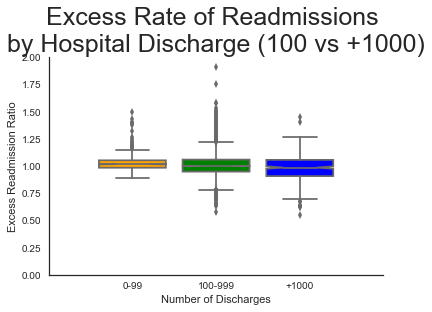

In [73]:
import seaborn as sns

sns.set_style("white")
ax = sns.boxplot(x="DischCat", y="Excess Readmission Ratio",
                 data=df, palette="Set3",notch=True)

ax.set_title('Excess Rate of Readmissions \nby Hospital Discharge (100 vs +1000)', fontsize=25)
ax.set_xlabel('Number of Discharges')
ax.set_ylabel('Excess Readmission Ratio')
x=[0,1,2]
labels=["0-99","100-999","+1000"]
plt.xticks(x, labels, rotation='horizontal')
plt.ylim(0,2)
plt.xlim(-1,3)
sns.despine()
# Select which box you want to change    
mybox1 = ax.artists[0]
mybox2 = ax.artists[1]
mybox3 = ax.artists[2]

# Change the appearance of that box
mybox1.set_facecolor('orange')
mybox2.set_facecolor('green')
mybox3.set_facecolor('blue')


plt.plot([-1, 125], [125,0],'b-.', linewidth=1)
plt.plot([-1, 155], [155,0], 'b-.', linewidth=1)

plt.show()

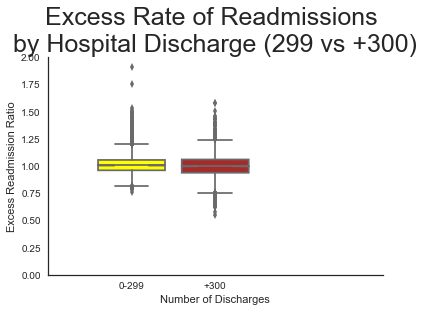

In [77]:
sns.set_style("white")
ax = sns.boxplot(x="DischCat300", y="Excess Readmission Ratio",
                 data=df, palette="Set3",notch=True)

ax.set_title('Excess Rate of Readmissions \nby Hospital Discharge (299 vs +300)', fontsize=25)
ax.set_xlabel('Number of Discharges')
ax.set_ylabel('Excess Readmission Ratio')
x=[0,1,2]
labels=["0-299","+300"]
plt.xticks(x, labels, rotation='horizontal')
plt.ylim(0,2)
plt.xlim(-1,3)
sns.despine()
# Select which box you want to change    
mybox1 = ax.artists[0]
mybox2 = ax.artists[1]

# Change the appearance of that box
mybox1.set_facecolor('yellow')
mybox2.set_facecolor('brown')


plt.plot([-1, 125], [125,0],'b-.', linewidth=1)
plt.plot([-1, 155], [155,0], 'b-.', linewidth=1)

plt.show()